max Z= 25.81587367320843, min Z= 0.0007028672946920252
max SNR = 33.14976814226546, min SNR = -12.500366774951532
PDR = 98.08
10000


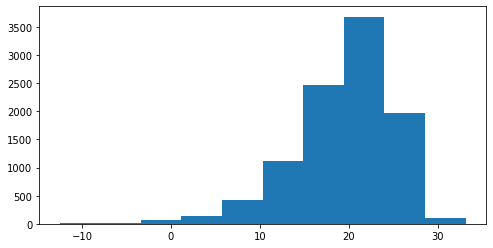

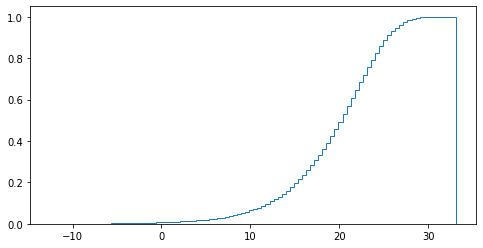

In [8]:
## https://stackoverflow.com/questions/55700338/how-to-generate-a-complex-gaussian-white-noise-signal-in-pythonor-numpy-scipy

import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib import mlab


N = 10_000
Z = []
for _ in range(N):
    # np.random.seed(5)
    x = np.random.normal(loc=0, scale=math.sqrt(0.99), size=(1, 2)).view(np.complex128) ## estimated 
    y = np.random.normal(loc=0, scale=math.sqrt(0.01), size=(1, 2)).view(np.complex128) ## error ## TODO
    z = x+y
    # print(f"x = {x}\n")
    # print(f"y = {y}\n")
    # print(f"z = {z}\n")
    # print((z[0]), abs(z[0])**2)
    Z.append(abs(z[0])**2)

print(f"max Z= {np.max(Z)}, min Z= {np.min(Z)}")

SNR = []

for i in Z:
    power = 1 ## watts ## 50 DBM = 10 WATT among 10 RBs
    gain = i
    loss = 500**(-3)
    noise_power = 10**(-10)
    snr = 10*math.log10(power*gain*loss/noise_power)
    SNR.append(snr)

print(f"max SNR = {np.max(SNR)}, min SNR = {np.min(SNR)}")

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(SNR, bins=10)
# plt.show()
count = len([i for i in SNR if i > 5])
print(f"PDR = {count*100/N}")
print(len(Z))
###############

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(SNR, bins=100, density=True, histtype='step', cumulative=True, label='CDF')

plt.show()


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx import *
import random
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.approximation import min_weighted_dominating_set
from itertools import product  
# from age_calculation import *

# from networkx.algorithms.approximation import dominating_set
from parameters import *
# from create_graph_1 import *
from itertools import combinations
from itertools import permutations
import pickle
import itertools
%matplotlib inline  

2 connection - 
UL RBs same 10 and DL RBs are different 20, 30, 40

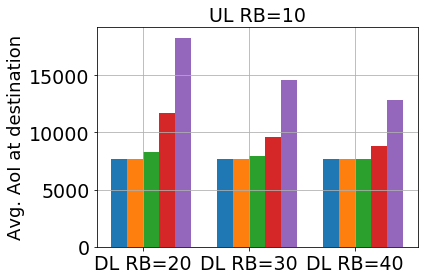

In [10]:
path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/2_connection/28dev_10UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp1_mad     = np.mean(MAD_28U_final[28])
exp1_omad    = np.mean(omad_28U_final[28])
exp1_greedy  = np.mean(greedy_28U_final[28])
exp1_random  = np.mean(random_28U_final[28])
exp1_rr      = np.mean(rr_28U_final[28])

###########################################################

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/2_connection/28dev_10UL_30DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp2_mad     = np.mean(MAD_28U_final[28])
exp2_omad    = np.mean(omad_28U_final[28])
exp2_greedy  = np.mean(greedy_28U_final[28])
exp2_random  = np.mean(random_28U_final[28])
exp2_rr = np.mean(rr_28U_final[28])

############################################################ 

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/2_connection/28dev_10UL_40DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp3_mad     = np.mean(MAD_28U_final[28])
exp3_omad    = np.mean(omad_28U_final[28])
exp3_greedy  = np.mean(greedy_28U_final[28])
exp3_random  = np.mean(random_28U_final[28])
exp3_rr      = np.mean(rr_28U_final[28])


############################################################


## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 
omad=    [ exp1_omad/28 ,   exp2_omad/28,    exp3_omad/28] 
MAD =    [ exp1_mad/28 ,   exp2_mad/28,    exp3_mad/28] 
greedy = [ exp1_greedy/28 , exp2_greedy/28, exp3_greedy/28] 
random = [ exp1_random/28 , exp2_random/28, exp3_random/28]
rr =     [exp1_rr/28 , exp2_rr/28, exp3_rr/28]
  
N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.15         # the width of the bars

p1 = ax.bar(ind, omad, width, bottom=0)
p2 = ax.bar(ind + width, MAD, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, rr, width, bottom=0)
p5 = ax.bar(ind + 4*width, random, width, bottom=0)


ax.set_title('UL RB=10', fontsize=19)
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( 'DL RB=20', 'DL RB=30', 'DL RB=40')) #, '250'))
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)

# ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
# plt.legend(bbox_to_anchor=(4.05, 4.0), loc='upper left')

# legend = ax.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.06, -0.63), ncol = 2)

# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('omad', 'maf-mad', 'greedy','rr', 'random'), fontsize=20, loc='lower right') ## bbox_to_anchor=(0.06, -0.63), ncol = 2


# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Avg. AoI at destination', fontsize=18)
plt.grid('True')
plt.tight_layout()
plt.show()

2 connection - DL RBs same 20 and UL RBs are different 5, 10, 15

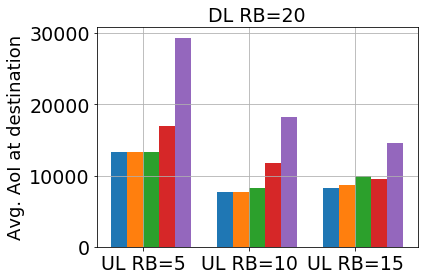

In [11]:
path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/2_connection/28dev_5UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp1_mad     = np.mean(MAD_28U_final[28])
exp1_omad    = np.mean(omad_28U_final[28])
exp1_greedy  = np.mean(greedy_28U_final[28])
exp1_random  = np.mean(random_28U_final[28])
exp1_rr      = np.mean(rr_28U_final[28])

###########################################################

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/2_connection/28dev_10UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp2_mad     = np.mean(MAD_28U_final[28])
exp2_omad    = np.mean(omad_28U_final[28])
exp2_greedy  = np.mean(greedy_28U_final[28])
exp2_random  = np.mean(random_28U_final[28])
exp2_rr = np.mean(rr_28U_final[28])

############################################################ 

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/2_connection/28dev_15UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp3_mad     = np.mean(MAD_28U_final[28])
exp3_omad    = np.mean(omad_28U_final[28])
exp3_greedy  = np.mean(greedy_28U_final[28])
exp3_random  = np.mean(random_28U_final[28])
exp3_rr      = np.mean(rr_28U_final[28])


############################################################


## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 
omad=    [ exp1_omad/28 ,   exp2_omad/28,    exp3_omad/28] 
MAD =    [ exp1_mad/28 ,   exp2_mad/28,    exp3_mad/28] 
greedy = [ exp1_greedy/28 , exp2_greedy/28, exp3_greedy/28] 
random = [ exp1_random/28 , exp2_random/28, exp3_random/28]
rr =     [exp1_rr/28 , exp2_rr/28, exp3_rr/28]
  
N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.15         # the width of the bars

p1 = ax.bar(ind, omad, width, bottom=0)
p2 = ax.bar(ind + width, MAD, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, rr, width, bottom=0)
p5 = ax.bar(ind + 4*width, random, width, bottom=0)


ax.set_title('DL RB=20', fontsize=19)
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( 'UL RB=5', 'UL RB=10', 'UL RB=15')) #, '250'))
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)

# ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
# plt.legend(bbox_to_anchor=(4.05, 4.0), loc='upper left')

# legend = ax.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.06, -0.63), ncol = 2)

# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('omad', 'maf-mad', 'greedy','rr', 'random'), fontsize=20, loc='lower right') ## bbox_to_anchor=(0.06, -0.63), ncol = 2


# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Avg. AoI at destination', fontsize=18)
plt.grid('True')
plt.tight_layout()
plt.show()

1 connection - UL RBs same 10 and DL RBs are different 20, 30, 40

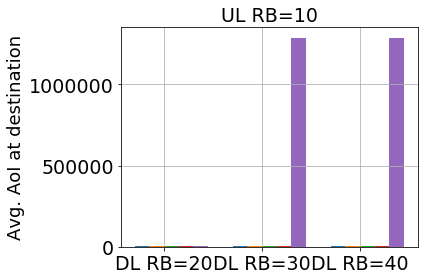

In [14]:
path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_10UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp1_mad     = np.mean(MAD_28U_final[28])
exp1_omad    = np.mean(omad_28U_final[28])
exp1_greedy  = np.mean(greedy_28U_final[28])
exp1_random  = np.mean(random_28U_final[28])
exp1_rr      = np.mean(rr_28U_final[28])

###########################################################

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_10UL_30DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp2_mad     = np.mean(MAD_28U_final[28])
exp2_omad    = np.mean(omad_28U_final[28])
exp2_greedy  = np.mean(greedy_28U_final[28])
exp2_random  = np.mean(random_28U_final[28])
exp2_rr = np.mean(rr_28U_final[28])

############################################################ 

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_10UL_40DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp3_mad     = np.mean(MAD_28U_final[28])
exp3_omad    = np.mean(omad_28U_final[28])
exp3_greedy  = np.mean(greedy_28U_final[28])
exp3_random  = np.mean(random_28U_final[28])
exp3_rr      = np.mean(rr_28U_final[28])


############################################################


## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 
omad=    [ exp1_omad/28 ,   exp2_omad/28,    exp3_omad/28] 
MAD =    [ exp1_mad/28 ,   exp2_mad/28,    exp3_mad/28] 
greedy = [ exp1_greedy/28 , exp2_greedy/28, exp3_greedy/28] 
random = [ exp1_random/28 , exp2_random/28, exp3_random/28]
rr =     [exp1_rr/28 , exp2_rr/28, exp3_rr/28]
  
N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.15         # the width of the bars

p1 = ax.bar(ind, omad, width, bottom=0)
p2 = ax.bar(ind + width, MAD, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, rr, width, bottom=0)
p5 = ax.bar(ind + 4*width, random, width, bottom=0)


ax.set_title('UL RB=10', fontsize=19)
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( 'DL RB=20', 'DL RB=30', 'DL RB=40')) #, '250'))
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)

# ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
# plt.legend(bbox_to_anchor=(4.05, 4.0), loc='upper left')

# legend = ax.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.06, -0.63), ncol = 2)

# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('omad', 'maf-mad', 'greedy','rr', 'random'), fontsize=20, loc='lower right') ## bbox_to_anchor=(0.06, -0.63), ncol = 2


# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Avg. AoI at destination', fontsize=18)
plt.grid('True')
plt.tight_layout()
plt.show()

1 connection - DL RBs same 20 and UL RBs are different 5, 10, 15

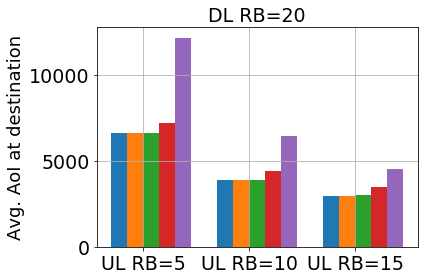

In [15]:
path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_5UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp1_mad     = np.mean(MAD_28U_final[28])
exp1_omad    = np.mean(omad_28U_final[28])
exp1_greedy  = np.mean(greedy_28U_final[28])
exp1_random  = np.mean(random_28U_final[28])
exp1_rr      = np.mean(rr_28U_final[28])

###########################################################

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_10UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp2_mad     = np.mean(MAD_28U_final[28])
exp2_omad    = np.mean(omad_28U_final[28])
exp2_greedy  = np.mean(greedy_28U_final[28])
exp2_random  = np.mean(random_28U_final[28])
exp2_rr = np.mean(rr_28U_final[28])

############################################################ 

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_15UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp3_mad     = np.mean(MAD_28U_final[28])
exp3_omad    = np.mean(omad_28U_final[28])
exp3_greedy  = np.mean(greedy_28U_final[28])
exp3_random  = np.mean(random_28U_final[28])
exp3_rr      = np.mean(rr_28U_final[28])


############################################################


## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 
omad=    [ exp1_omad/28 ,   exp2_omad/28,    exp3_omad/28] 
MAD =    [ exp1_mad/28 ,   exp2_mad/28,    exp3_mad/28] 
greedy = [ exp1_greedy/28 , exp2_greedy/28, exp3_greedy/28] 
random = [ exp1_random/28 , exp2_random/28, exp3_random/28]
rr =     [exp1_rr/28 , exp2_rr/28, exp3_rr/28]
  
N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.15         # the width of the bars

p1 = ax.bar(ind, omad, width, bottom=0)
p2 = ax.bar(ind + width, MAD, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, rr, width, bottom=0)
p5 = ax.bar(ind + 4*width, random, width, bottom=0)


ax.set_title('DL RB=20', fontsize=19)
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( 'UL RB=5', 'UL RB=10', 'UL RB=15')) #, '250'))
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)

# ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
# plt.legend(bbox_to_anchor=(4.05, 4.0), loc='upper left')

# legend = ax.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.06, -0.63), ncol = 2)

# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('omad', 'maf-mad', 'greedy','rr', 'random'), fontsize=20, loc='lower right') ## bbox_to_anchor=(0.06, -0.63), ncol = 2


# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Avg. AoI at destination', fontsize=18)
plt.grid('True')
plt.tight_layout()
plt.show()

In [16]:
# /home/biplav/AoI/old_dist_AoI_ver4/models/2021-06-27 23:52

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_5UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp1_mad     = np.mean(MAD_28U_final[28])
exp1_omad    = np.mean(omad_28U_final[28])
exp1_greedy  = np.mean(greedy_28U_final[28])
exp1_random  = np.mean(random_28U_final[28])
exp1_rr      = np.mean(rr_28U_final[28])

###########################################################

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_10UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp2_mad     = np.mean(MAD_28U_final[28])
exp2_omad    = np.mean(omad_28U_final[28])
exp2_greedy  = np.mean(greedy_28U_final[28])
exp2_random  = np.mean(random_28U_final[28])
exp2_rr = np.mean(rr_28U_final[28])

############################################################ 

path = "/home/biplav/AoI/results/dist_AoI_ver4/RB_effects/1_connection/28dev_15UL_20DL/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


omad_28U_final = pickle.load(open(path_RP + "28U_omad_greedy_UL_overall.pickle", "rb"))
MAD_28U_final = pickle.load(open(path_RP + "28U_mad_overall.pickle", "rb"))
random_28U_final = pickle.load(open(path_RP + "28U_random_overall.pickle", "rb"))
greedy_28U_final = pickle.load(open(path_RP + "28U_greedy_overall.pickle", "rb"))
rr_28U_final = pickle.load(open(path_RP + "28U_rr_overall.pickle", "rb"))


exp3_mad     = np.mean(MAD_28U_final[28])
exp3_omad    = np.mean(omad_28U_final[28])
exp3_greedy  = np.mean(greedy_28U_final[28])
exp3_random  = np.mean(random_28U_final[28])
exp3_rr      = np.mean(rr_28U_final[28])


############################################################


## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 
omad=    [ exp1_omad/28 ,   exp2_omad/28,    exp3_omad/28] 
MAD =    [ exp1_mad/28 ,   exp2_mad/28,    exp3_mad/28] 
greedy = [ exp1_greedy/28 , exp2_greedy/28, exp3_greedy/28] 
random = [ exp1_random/28 , exp2_random/28, exp3_random/28]
rr =     [exp1_rr/28 , exp2_rr/28, exp3_rr/28]
  
N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.15         # the width of the bars

p1 = ax.bar(ind, omad, width, bottom=0)
p2 = ax.bar(ind + width, MAD, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, rr, width, bottom=0)
p5 = ax.bar(ind + 4*width, random, width, bottom=0)


ax.set_title('DL RB=20', fontsize=19)
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( 'UL RB=5', 'UL RB=10', 'UL RB=15')) #, '250'))
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)

# ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
# plt.legend(bbox_to_anchor=(4.05, 4.0), loc='upper left')

# legend = ax.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.06, -0.63), ncol = 2)

# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('omad', 'maf-mad', 'greedy','rr', 'random'), fontsize=20, loc='lower right') ## bbox_to_anchor=(0.06, -0.63), ncol = 2


# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Avg. AoI at destination', fontsize=18)
plt.grid('True')
plt.tight_layout()
plt.show()

[154.97, 66.52]